In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [8]:
data = {
    'untuned-phase-3-LDA':.30,
    'tuned-phase-1-baseline':0.3194,
    'tuned-phase-2-replies':0.3305,
    'tuned-phase-2-reply-coefficients':0.3193,
    'tuned-phase-3-LDA':0.3234,
}
x = [key for key, value in data.items()]
y = [value for key, value in data.items()]

(0.29, 0.34)

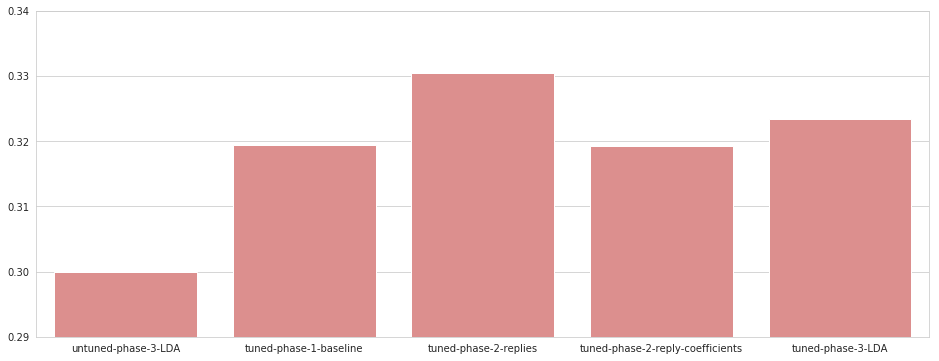

In [9]:
plt.figure(figsize=(16, 6))

sns.set_style("whitegrid")
# sns.set_palette(sns.light_palette("green"))
fig = sns.barplot(x=x, y=y, color='#E98381')
fig.set_ylim(0.29, .34)


In [113]:
import torch 
t = torch.Tensor([[ 221.,  159.,  140.,   27.],
        [ 213., 2148.,  224.,   46.],
        [ 326.,  476., 5253., 1849.],
        [  16.,   37.,  359., 1336.]])
matrix = []
for row in t:
    norm = row.sum()
    row_vals = []
    for item in row:
        row_vals.append(item.item() / norm * 100)
        print('{:.2f}\%'.format(item.item() / norm * 100))
    matrix.append(row_vals)
matrix

40.40\%
29.07\%
25.59\%
4.94\%
8.10\%
81.64\%
8.51\%
1.75\%
4.12\%
6.02\%
66.46\%
23.39\%
0.92\%
2.12\%
20.54\%
76.43\%


[[tensor(40.4022), tensor(29.0676), tensor(25.5942), tensor(4.9360)],
 [tensor(8.0958), tensor(81.6420), tensor(8.5139), tensor(1.7484)],
 [tensor(4.1245), tensor(6.0223), tensor(66.4600), tensor(23.3932)],
 [tensor(0.9153), tensor(2.1167), tensor(20.5378), tensor(76.4302)]]

In [114]:
t.sum()

tensor(12830.)

In [115]:

import numpy as np
output_str = ''
for item in t:
    for item2 in item:
        output_str += "{:.2f} \%".format(item2.item()/item2.sum() * 100)
    output_str += '\n'

output_str

'100.00 \\%100.00 \\%100.00 \\%100.00 \\%\n100.00 \\%100.00 \\%100.00 \\%100.00 \\%\n100.00 \\%100.00 \\%100.00 \\%100.00 \\%\n100.00 \\%100.00 \\%100.00 \\%100.00 \\%\n'

In [116]:
import os
import sys
sys.path.append("..")
from globals import ROOT_DIR
data_file = os.path.join(ROOT_DIR, 'data/founta_data.npy')
data = np.load(data_file)
data = data[()]
path_labels = os.path.join(ROOT_DIR, 'data/founta_data.csv')
labels = pd.read_csv(path_labels, header='infer', index_col=0, squeeze=True).to_dict()

In [117]:
mapping = {'hateful': 0, 'abusive': 1, 'normal':2, 'spam':3}

In [118]:
# preds = []
# for key, value in data.items():
#     y = mapping[labels[value['id']]]
#     choice = np.random.choice([0,1], p=[0.04, .96])
#     if choice == 0:
#         preds.append(1)
#     else:
#         preds.append(0)            
# print(np.mean(preds))

0.04081123634039502


In [180]:
def plot_confusion_matrix(cm,classes=['Hateful', 'Abusive', 'Normal', 'Spam'],
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
#     fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            sample = cm[i,j].item()
            print(sample)
            sample = '{}%'.format(np.around(cm[i,j].item(), 1))
            ax.text(j, i, format(sample),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.grid(None)
    plt.savefig('fig.png')
    return ax




40.40219497680664
29.067642211914062
25.59415054321289
4.936014652252197
8.095781326293945
81.6419677734375
8.513873100280762
1.748384714126587
4.1244940757751465
6.0222673416137695
66.46002197265625
23.393218994140625
0.9153317809104919
2.1167047023773193
20.537755966186523
76.4301986694336


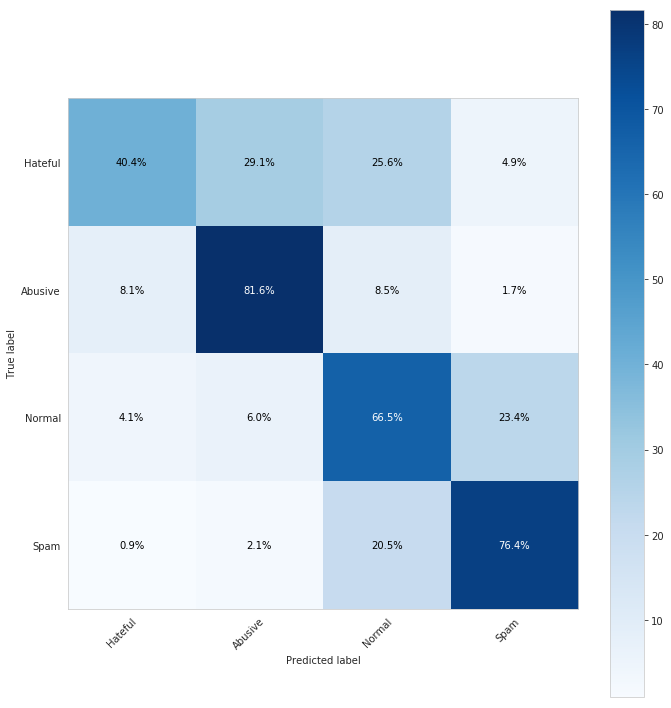

In [181]:
import numpy as np
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
ax = plot_confusion_matrix(torch.Tensor(matrix),
                      title='Confusion matrix, without normalization')

plt.show()

<Figure size 432x288 with 0 Axes>